Plotting Learning Rates

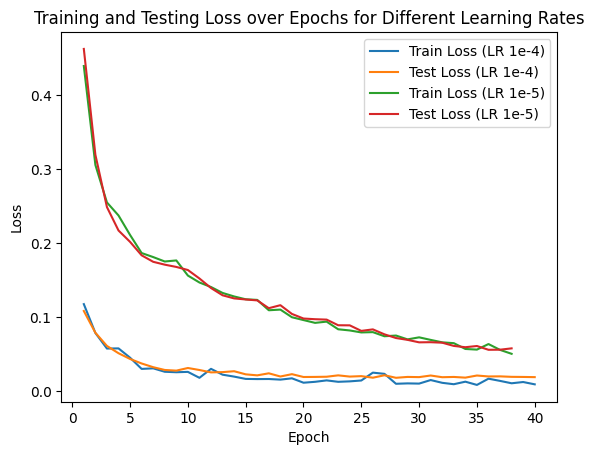

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files for different learning rates
df1 = pd.read_csv("./plots/lr1e-3BCE.csv")
df2 = pd.read_csv("./plots/lr1e-4BCE.csv")
df3 = pd.read_csv("./plots/lr1e-5BCE.csv")

# Plot the data
# plt.plot(df1["epoch"], df1["Train_loss"], label="Train Loss (LR 1e-3)")
# plt.plot(df1["epoch"], df1["Test_loss"], label="Test Loss (LR 1e-3)")

plt.plot(df2["epoch"], df2["Train_loss"], label="Train Loss (LR 1e-4)")
plt.plot(df2["epoch"], df2["Test_loss"], label="Test Loss (LR 1e-4)")

plt.plot(df3["epoch"], df3["Train_loss"], label="Train Loss (LR 1e-5)")
plt.plot(df3["epoch"], df3["Test_loss"], label="Test Loss (LR 1e-5)")

# Customize the plot
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Testing Loss over Epochs for Different Learning Rates")
plt.legend()

# Display the plot
plt.show()


**Training & Setup**

In [17]:
# ! python main_modeling.py

In [12]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

model = torch.load('./experiments/best/lr1e-4BCE.pt')
# model = torch.load('./experiments/weightsaugfrozenlr5e4MONSTER.pt')
#model = torch.load('./experiments/weightsnoaugGREAT.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

**EVALUTATION**

In [224]:
ino = 2
# Read  a sample image and mask from the data-set (ino is index no.)

img = cv2.imread(f'./data/train_data/Images/{ino:03d}.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR format (OpenCV default) to RGB
img = img.transpose(2, 0, 1).reshape(1, 3, 512, 512)
mask = cv2.imread(f'./data/train_data/Masks/{ino:03d}_label.PNG')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

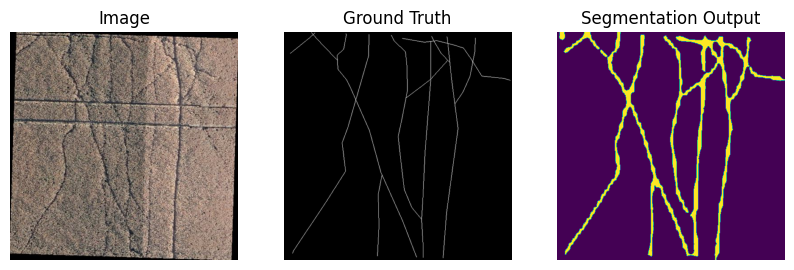

In [228]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>-3);
plt.title('Segmentation Output')
plt.axis('off');
plt.savefig('./SegmentationOutput.png',bbox_inches='tight')

In [226]:
import numpy as np
Max = np.max(a['out'].cpu().detach().numpy()[0][0])
Min = np.min(a['out'].cpu().detach().numpy()[0][0])
print(f"min: {Min} max: {Max}")

min: -18.117944717407227 max: 0.5138452053070068
